In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading the dataset
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.layers import Conv2D, Activation, GlobalAvgPool2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Sequential

file1 = '/content/drive/MyDrive/gaussian_filtered_images/gaussian_filtered_images'

from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Splitting the dataset into training and testing set
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = .33, horizontal_flip = True)
train_data_gen = image_generator.flow_from_directory(directory = file1, target_size = (384, 384), batch_size = 32, class_mode = 'categorical', subset = 'training')

val_data_gen = image_generator.flow_from_directory(directory = file1, target_size = (384, 384), batch_size = 24, class_mode = 'categorical', subset = 'validation')

Found 2467 images belonging to 5 classes.
Found 1211 images belonging to 5 classes.


In [ ]:
#Applying CNN to the dataset
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Dense(5, activation = 'relu', input_shape=[384, 384, 3]))
cnn.add(tf.keras.layers.Conv2D(128, kernel_size = [3,3], padding='valid', activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = [3,3], strides=2, padding = 'valid'))
cnn.add(tf.keras.layers.Conv2D(64, kernel_size = [2,2], padding='valid', activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = [2,2], strides=2, padding = 'valid'))
cnn.add(tf.keras.layers.Conv2D(32, kernel_size = [2,2], padding='valid', activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = [2,2], strides=2, padding = 'valid'))
cnn.add(tf.keras.layers.Conv2D(16, kernel_size = [2,2], padding='valid', activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = [2,2], strides=2, padding = 'valid'))
cnn.add(tf.keras.layers.Conv2D(8, kernel_size = [2,2], padding='valid', activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = [2,2], strides=2, padding = 'valid'))
cnn.add(tf.keras.layers.Conv2D(4, kernel_size = [2,2], padding='valid', activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = [2,2], strides=2, padding = 'valid'))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(5, activation='softmax'))
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['categorical_accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 384, 384, 5)       20        
                                                                 
 conv2d (Conv2D)             (None, 382, 382, 128)     5888      
                                                                 
 max_pooling2d (MaxPooling2  (None, 190, 190, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 189, 189, 64)      32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 94, 94, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 93, 93, 32)        8

In [ ]:
#Fitting the datatset into CNN model
history = cnn.fit(train_data_gen, validation_data = val_data_gen, epochs=30, verbose=2)

Epoch 1/30
78/78 - 754s - loss: 1.4358 - categorical_accuracy: 0.5719 - val_loss: 0.9572 - val_categorical_accuracy: 0.6689 - 754s/epoch - 10s/step
Epoch 2/30
78/78 - 39s - loss: 0.9543 - categorical_accuracy: 0.6713 - val_loss: 0.9579 - val_categorical_accuracy: 0.6631 - 39s/epoch - 503ms/step
Epoch 3/30
78/78 - 48s - loss: 0.9313 - categorical_accuracy: 0.6757 - val_loss: 0.8965 - val_categorical_accuracy: 0.6854 - 48s/epoch - 617ms/step
Epoch 4/30
78/78 - 39s - loss: 0.9101 - categorical_accuracy: 0.6903 - val_loss: 0.8880 - val_categorical_accuracy: 0.6763 - 39s/epoch - 505ms/step
Epoch 5/30
78/78 - 39s - loss: 0.8583 - categorical_accuracy: 0.6976 - val_loss: 0.8434 - val_categorical_accuracy: 0.6953 - 39s/epoch - 501ms/step
Epoch 6/30
78/78 - 39s - loss: 0.8565 - categorical_accuracy: 0.6996 - val_loss: 0.8976 - val_categorical_accuracy: 0.6763 - 39s/epoch - 503ms/step
Epoch 7/30
78/78 - 48s - loss: 0.8599 - categorical_accuracy: 0.7017 - val_loss: 0.8561 - val_categorical_accura

In [ ]:
import os

# List subdirectories (classes) within the directory
subdirectories = os.listdir(file1)

# Count the number of samples in each class
class_counts = {}
for subdir in subdirectories:
    subdir_path = os.path.join(file1, subdir)
    if os.path.isdir(subdir_path):
        num_samples = len(os.listdir(subdir_path))
        class_counts[subdir] = num_samples

print("Class Counts:", class_counts)

Class Counts: {'Severe': 193, 'No_DR': 1815, 'Moderate': 1005, 'Mild': 370, 'Proliferate_DR': 295}


1/1 [==============================] - 0s 475ms/step
Retinal image with Moderate DR
[[0.01261268 0.095369   0.49285436 0.22713201 0.17203192]]


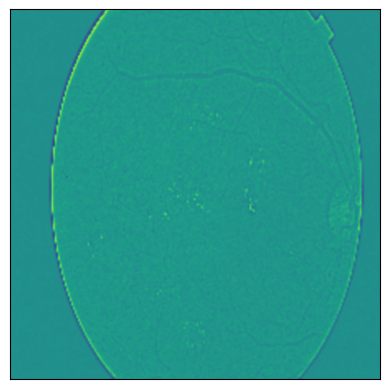

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import cv2

def prepare(image):
  IMG_SIZE=384
  img_array = cv2.imread('/content/drive/MyDrive/gaussian_filtered_images/gaussian_filtered_images/Moderate/000c1434d8d7.png', cv2.IMREAD_COLOR)
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

y=cnn.predict([prepare('/content/drive/MyDrive/gaussian_filtered_images/gaussian_filtered_images/Moderate/000c1434d8d7.png')])
print('Retinal image with Moderate DR')
print(y)

img = cv2.imread('/content/drive/MyDrive/gaussian_filtered_images/gaussian_filtered_images/Moderate/000c1434d8d7.png',0)
plt.imshow(img, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
np.argmax(y)

2

1/1 [==============================] - 0s 20ms/step
Retinal image with Mild DR
[[0.01291931 0.10616565 0.7590089  0.09557297 0.02633307]]


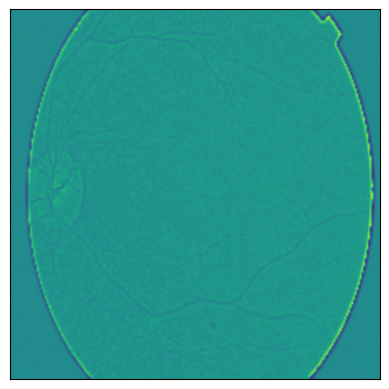

In [ ]:
def prepare(image):
  IMG_SIZE=384
  img_array = cv2.imread('/content/drive/MyDrive/gaussian_filtered_images/gaussian_filtered_images/Mild/0024cdab0c1e.png', cv2.IMREAD_COLOR)
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

x=cnn.predict([prepare('/content/drive/MyDrive/gaussian_filtered_images/gaussian_filtered_images/Mild/0024cdab0c1e.png')])
print('Retinal image with Mild DR')
print(x)

img = cv2.imread('/content/drive/MyDrive/gaussian_filtered_images/gaussian_filtered_images/Mild/0024cdab0c1e.png',0)
plt.imshow(img, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
np.argmax(x)

2

1/1 [==============================] - 0s 18ms/step
Retinal image with Proliferate DR
[[0.01404786 0.24152918 0.40686077 0.20071305 0.13684914]]


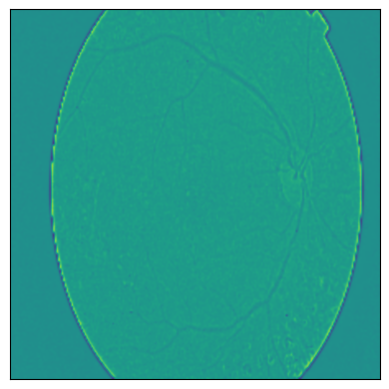

In [ ]:
def prepare(image):
  IMG_SIZE=384
  img_array = cv2.imread('/content/drive/MyDrive/gaussian_filtered_images/gaussian_filtered_images/Proliferate_DR/001639a390f0.png', cv2.IMREAD_COLOR)
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

z=cnn.predict([prepare('/content/drive/MyDrive/gaussian_filtered_images/gaussian_filtered_images/Proliferate_DR/001639a390f0.png')])
print('Retinal image with Proliferate DR')
print(z)

img = cv2.imread('/content/drive/MyDrive/gaussian_filtered_images/gaussian_filtered_images/Proliferate_DR/001639a390f0.png',0)
plt.imshow(img, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
np.argmax(z)

2

1/1 [==============================] - 0s 20ms/step
Retinal image with No DR
[[0.00287436 0.17381945 0.5713271  0.06850819 0.18347098]]


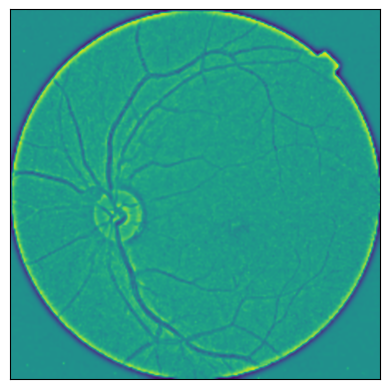

In [ ]:
def prepare(image):
  IMG_SIZE=384
  img_array = cv2.imread('/content/drive/MyDrive/gaussian_filtered_images/gaussian_filtered_images/No_DR/002c21358ce6.png', cv2.IMREAD_COLOR)
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

a=cnn.predict([prepare('/content/drive/MyDrive/gaussian_filtered_images/gaussian_filtered_images/No_DR/002c21358ce6.png')])
print('Retinal image with No DR')
print(a)

img = cv2.imread('/content/drive/MyDrive/gaussian_filtered_images/gaussian_filtered_images/No_DR/002c21358ce6.png',0)
plt.imshow(img, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
np.argmax(a)

2

1/1 [==============================] - 0s 18ms/step
Retinal image with Severe DR
[[0.01014982 0.10296008 0.7444074  0.09289111 0.04959162]]


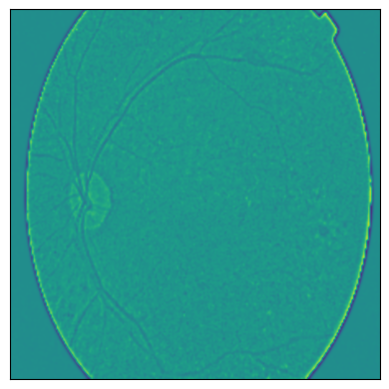

In [ ]:
def prepare(image):
  IMG_SIZE=384
  img_array = cv2.imread('/content/drive/MyDrive/gaussian_filtered_images/gaussian_filtered_images/Severe/03c85870824c.png', cv2.IMREAD_COLOR)
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

b=cnn.predict([prepare('/content/drive/MyDrive/gaussian_filtered_images/gaussian_filtered_images/Severe/03c85870824c.png')])
print('Retinal image with Severe DR')
print(b)

img = cv2.imread('/content/drive/MyDrive/gaussian_filtered_images/gaussian_filtered_images/Severe/03c85870824c.png',0)
plt.imshow(img, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
np.argmax(b)

2